## 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import "NBA_players_csv" 

df = pd.read_csv(r'/Users/jlsanabria77/Desktop/FINAL PROJECT 6 NBA/Scripts/Data/Prepared Data/NBA_players.csv',engine ='python')

 ## 3. Data Preparation for regression analysis

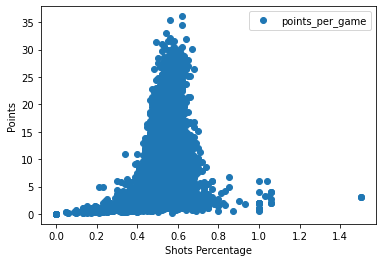

In [24]:
# The dataframe was already cleaned so I will proceed to create a scatterpplot to check the relationship of two variables.
df.plot(x = 'shots_pct', y='points_per_game',style='o') 
plt.title('')  
plt.xlabel('Shots Percentage')  
plt.ylabel('Points')  
plt.show()

# Hypothesis.
## NBA players accuracy does not mean higher points scored.

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['shots_pct'].values.reshape(-1,1)
y = df['points_per_game'].values.reshape(-1,1)

In [26]:
X

array([[0.48],
       [0.43],
       [0.38],
       ...,
       [0.64],
       [0.52],
       [0.66]])

In [27]:
y

array([[5.7],
       [2.3],
       [0.8],
       ...,
       [6.1],
       [2.1],
       [4.5]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [33]:
# Create a regression object to be inserted nto the training set.

regression = LinearRegression()  

In [34]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

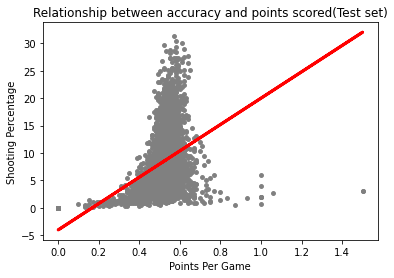

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship between accuracy and points scored(Test set)')
plot_test.xlabel('Points Per Game')
plot_test.ylabel('Shooting Percentage')
plot_test.show()

There is a positive correlation between higher percentage of shooting and higher scores. More accurate players can score more points. However this is not always the case and as we can see on this scatter plot the highest scores are not always accomplished thorugh the highest percentages. We can also see that sometimes very accurate performances yield very little points.

## Create the model performance statistics- MSE and R2

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # The mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[24.0607867]]
Mean squared error:  29.257296673790517
R2 score:  0.12034981177317872


In [39]:
y_predicted

array([[ 8.7118326 ],
       [ 4.380891  ],
       [10.39608767],
       ...,
       [ 7.990009  ],
       [ 8.47122474],
       [ 8.47122474]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9.0,8.711833
1,1.6,4.380891
2,11.3,10.396088
3,1.5,3.659067
4,16.3,9.914872
5,6.2,9.674264
6,12.0,8.952440
7,6.2,8.711833
8,2.0,5.583930
9,8.6,8.471225


By looking the summary statistics we can say that there is a positive correlation between both variables sinse the slope is also positive. The Mean Square Error has a high number meaninig that the regression is not very accurate. Also, as the R2 is close to zero (0.12), it is safe to say that those two variables do not have a strong correlation.

This is finally corroborated by looking at the dataframe created with y values (points_per_game) and their predicted values. This indicates that the model is not accurate in describing the relationship between shooting accuracy and number of points scored.